# Where to live? A personalized neighborhood identifier for expats
## Capstone Project report

## 1. Introduction

Where you live to a high degree determine the life you will be living. The real estate prices determines how much money you'll have left for things more fun than rent. The shops, restaurants, parks, recreation opportunities, etc., all have an influence on what your everyday life will and can look like. 

It can be hard enough to choose a neighborhood or city in your own state or country. If you are moving abroad for a new job, determining where to settle down becomes all the more difficult, as you will likely have very limited experience and information about wthe characteristics of different citites or neighborhood. 

My husband and I are experiencing this firsthand. We used to live in a downtown neighborhood of Copenhagen (Denmark), but my husband recently got a new job across the Atlantic ocean at the outskirts of Denver, Colorado. We know little to nothing about Denver and the nearby cities, so where do we start our search for a new home? Which city and neighborhood would we be most happy in?

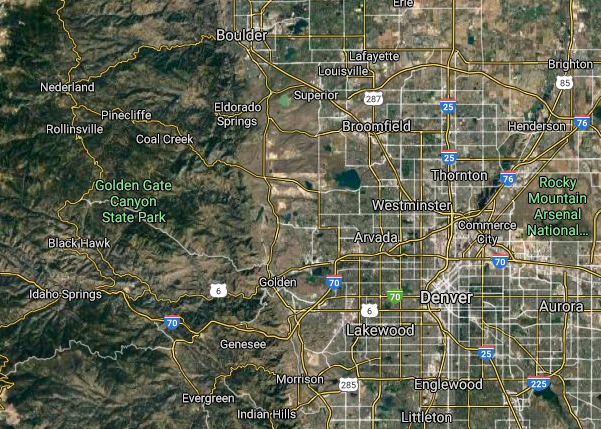

This data science analysis sets out to create a model that can help an expat determine where to start the search for a new place to live when moving to a new country. The title says neighborhood, but depending on the size of the cities or towns in question, it might as well be called a city locator guide. Our own situation is used as a case study, but the study should be replicable for other situations. 

### Evaluation criteria
We have one criteria for our new home location, which is non-negotiable. It must be within a reasonable transportation time to work.

**Constraint**
* Reasonable transportation time home-workplace

We have also made a list of things that we believe will make us appreciate a local neighborhood. However, we don't know how to prioritize them. 

**Preferences**
* Affordable rental prices
* Nature/trails in the surrounding area
* Presence of coffee shops, breweries and restaurants
* Parks (dog walking opportunities)
* Opportunity to do sports


It should be noted here, that the evaluation criteria used to determine whether an expat would like living in a location or not, will of course vary widely depending on the expats preferences, life situation, etc. The criteria listed above are not meant to represent any generalization of what characterizes a good place to life. 

### Expected outcome

As has been mentioned above, this is a case study, and therefore focused on our situation, location and preferences. Furthermore, this study does not aim at predicting the optimal place to live for us - in reality, the perfect apartment in the third-best neighborhood may be a much better choice than a average-apartment in the best neighborhood. Instead, the outcome of this analysis will be a list of the top neighborhoods for us in the specified area, giving us a much better starting point for our search for a new home. 

## 2. Data



The data for the analysis can be divided into three parts: Data regarding the locations to investigate, data regarding housing prices and data regarding 

#### 1. Narrowing down the field - areas to investigate
As the first step, I will define our list of prospect home locations by zipcodes. Defining areas by zipcodes is chosen because the study covers cities and suburbs of different sizes, making it difficult to obtain a full list of neighborhoods to investigate. 

The study is limited by our constraint that it must be within reasonable transportation time from home to workplace. Based on this requirement, I have chosen the city of Westminster as the starting point for generating a 15-mile radius to cover our study. This will ensure that the study covers the cities of Denver, Golden and Boulder and that no location is either very far from work nor from the mountains. 

A list of all the 87 zip codes within a 15 miles radius of the zip code 80021 (Westminster) can be retrieved from the web page [Zip-codes.com](https://www.zip-codes.com/zip-code-radius-finder.asp?zipmileslow=0&zipmileshigh=15&zip1=80021&submit=Search). The result is also illustrated on the map below using [Free Map Tools](https://www.freemaptools.com/find-zip-codes-inside-radius.htm)

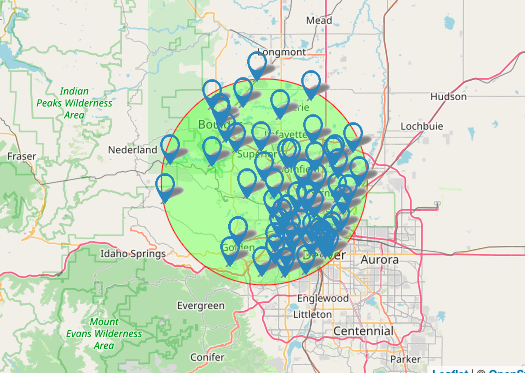

It would be nice to connect the zip codes to cities as well as to their geographical coordinates. The Federal Government of the US have created a database for all US zip codes, which can be accesed from the data sharing platform [OpenDataSoft](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=CO). Before retrieving the data with a web scrape, I have restricted the results to only show zip codes in the state of Colorado, which yields 2.487 zip codes. 

Merging the two datasets based on zip codes will generate a dataset of all the zip codes within our investigation radius, including the city and latitude and longitude. 

#### 2. Budget constraints - housing prices
In order to evaluate the relative affordability of an area, I want to compare the rental prices of the different areas. Rental price is chosen over real estate price, as we don't want to buy anything right know, even if the two would be expected to be highly correlated. 

Data on rental prices by zip codes has been provided by Zillow, an online real estate database company. The data is updated monthly, and lists rental prices either by house type (for example House 1 bedroom) or by square meter. The data is retrieved from [OpenDataSoft](https://public.opendatasoft.com/explore/dataset/rental-values/table/?disjunctive.regionname&disjunctive.city&disjunctive.state&disjunctive.metro&disjunctive.countyname&refine.state=CO), and sorted to only include zip codes in Colorado. The fact that the data is already sorted by zip codes makes it easy to compare rental prices across zip codes. The current size of this dataset is 22.431 rows (April 2020). 

#### 3. Facilities and surroundings - Foursquare
In order to explore the characteristics of the different neighborhoods, such as parks, trails, coffee shops, etc., I will use data provided by [Foursquare](https://foursquare.com/). Foursquare started as a social networking media, where you could easily let your friends know where you were and what you were doing. It has now developed into *"the most trusted, independent location data platform for understanding how people move through the real world"* according to its own webpage. Foursquare is similar to Yelp and TripAdvisor, and its users rate and recommend everything from restaurants to trails and airport lounges. Foursquare has data about the location of a wide range of different category of 'venues' (locations providing opportunities for shopping, eating, drinking or other activities) as well as knowledge about the popularity of each of these among its users. 

Using the Foursquare API, I can collect information regarding venues located in each zip code. This information will be the main data used for the analysis.